In [45]:
#Regession Model Building 

#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [46]:
file = r'C:\Users\drewv\OneDrive - University of Calgary\Drew_HardDrive\Documents\Repositories\Natural_Gas_Projects\S&D Model\Demand_Forecast_Best.xlsx'
df = pd.read_excel(file, sheet_name='Northern-Califorina', skiprows= 11)
df.columns

Index([                                                   'Date',
                                                         'Month',
                                                          'Year',
       'Natural Gas Delivered to Consumers in California (MMcf)',
                                       'North California Demand',
                                     'SM Monthly Max Daily Temp',
                                    'SM Monthly Min  Daily Temp',
                                        'SM Monthly Mean of HDD',
                                        'SF Monthly Mean of CDD',
                                         'SM Monthly Sum of HDD',
                                     'SF Monthly Max Daily Temp',
                                    'SF Monthly Min  Daily Temp',
                                         'SF Monthly Sum of HDD',
                                         'SF Monthly Sum of CDD',
                                           'SF Monthly Max Temp',
          

In [47]:
#Filtering to only get the data i need
df = df.loc[:,"Date":'SJ Monthly Max Temp']

In [48]:
#Defining Dependent and Independent
Y = df['North California Demand']
X = df.loc[:,'SM Monthly Max Daily Temp':'SJ Monthly Max Temp']


In [49]:
#Creating a Node
lm = LinearRegression()

In [50]:
lm.fit(X,Y)

LinearRegression()

In [51]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)

In [52]:
Yhat = lm.predict(X)

C:\Users\drewv\AppData\Local\Temp\ipykernel_23872\1852740184.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['North California Demand'], hist=False, color="r", label="Actual Value")
C:\Users\drewv\AppData\Local\Temp\ipykernel_23872\1852740184.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

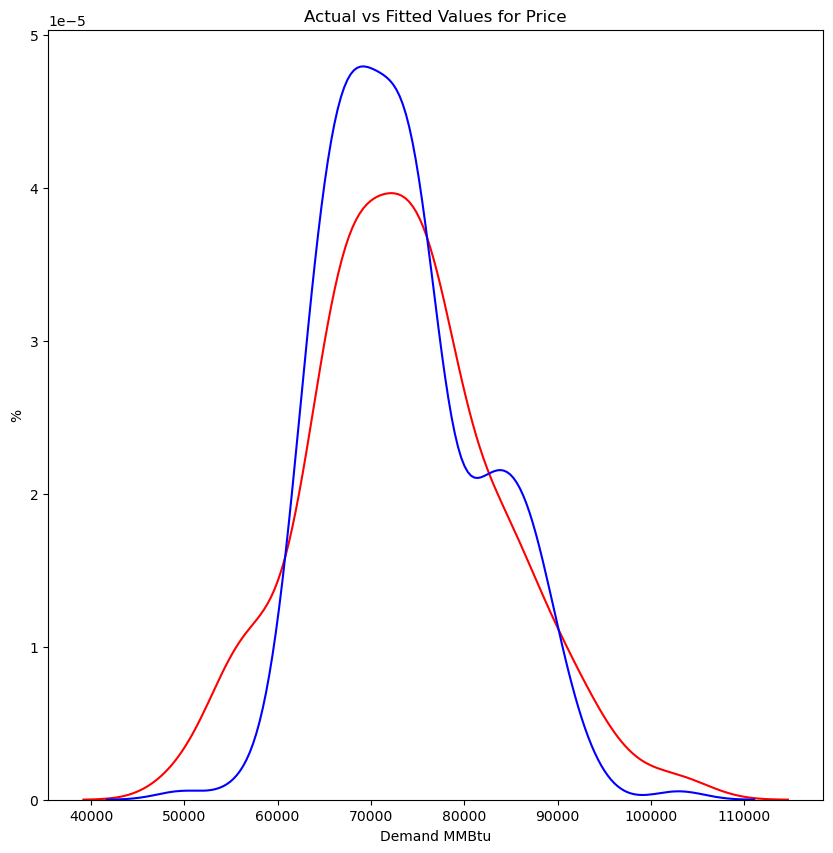

In [53]:
plt.figure(figsize=(10, 10))


ax1 = sns.distplot(df['North California Demand'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Demand MMBtu')
plt.ylabel('%')

plt.show()
plt.close()

In [54]:
print('The R-square is: ', lm.score(X, Y))
#Need to improve tails of and reduce the peak of the dist 

The R-square is:  0.6518467176516325


In [55]:
import statsmodels.api as sm

# Assuming you have X and Y already defined

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(Y, X).fit()

# Get the summary of the regression model
summary = model.summary()



# Print the p-values
print("P-values for coefficients:", summary)




P-values for coefficients:                                OLS Regression Results                              
Dep. Variable:     North California Demand   R-squared:                       0.652
Model:                                 OLS   Adj. R-squared:                  0.633
Method:                      Least Squares   F-statistic:                     34.24
Date:                     Sat, 14 Oct 2023   Prob (F-statistic):           1.25e-50
Time:                             18:17:03   Log-Likelihood:                -2742.7
No. Observations:                      271   AIC:                             5515.
Df Residuals:                          256   BIC:                             5569.
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [65]:
df.columns

Index(['Date', 'Month', 'Year',
       'Natural Gas Delivered to Consumers in California (MMcf)',
       'North California Demand', 'SM Monthly Max Daily Temp',
       'SM Monthly Min  Daily Temp', 'SM Monthly Mean of HDD',
       'SF Monthly Mean of CDD', 'SM Monthly Sum of HDD',
       'SF Monthly Max Daily Temp', 'SF Monthly Min  Daily Temp',
       'SF Monthly Sum of HDD', 'SF Monthly Sum of CDD', 'SF Monthly Max Temp',
       'SJ Monthly Max Daily Temp', 'SJ Monthly Min Daily Temp',
       'SJ Monthly Sum of HDD', 'SJ Monthly Sum of CDD',
       'SJ Monthly Max Temp'],
      dtype='object')

In [67]:
df_corr_table = df.loc[:,'North California Demand': 'SJ Monthly Max Temp']
df_corr_table.corr()

,North California Demand,SM Monthly Max Daily Temp,SM Monthly Min Daily Temp,SM Monthly Mean of HDD,SF Monthly Mean of CDD,SM Monthly Sum of HDD,SF Monthly Max Daily Temp,SF Monthly Min Daily Temp,SF Monthly Sum of HDD,SF Monthly Sum of CDD,SF Monthly Max Temp,SJ Monthly Max Daily Temp,SJ Monthly Min Daily Temp,SJ Monthly Sum of HDD,SJ Monthly Sum of CDD,SJ Monthly Max Temp
North California Demand,1.000000,-0.588791,-0.475704,-0.459019,-0.265589,-0.464404,-0.484036,-0.484136,-0.484136,-0.168044,-0.133464,-0.614493,-0.512732,-0.246739,-0.242187,-0.468520
SM Monthly Max Daily Temp,-0.588791,1.000000,0.913318,0.853188,0.845941,0.849744,0.713103,0.855254,0.855254,0.434724,0.411037,0.948119,0.916243,0.235629,0.814478,0.771407
SM Monthly Min Daily Temp,-0.475704,0.913318,1.000000,0.869678,0.904472,0.862981,0.571114,0.904810,0.904810,0.355044,0.337659,0.846552,0.978904,0.246685,0.855255,0.715395
SM Monthly Mean of HDD,-0.459019,0.853188,0.869678,1.000000,0.856508,0.998827,0.435029,0.748306,0.748306,0.196820,0.183741,0.770343,0.855135,0.262440,0.761070,0.563824
SF Monthly Mean of CDD,-0.265589,0.845941,0.904472,0.856508,1.000000,0.851186,0.462187,0.792075,0.792075,0.331954,0.319121,0.768769,0.875311,0.174083,0.950325,0.625428
SM Monthly Sum of HDD,-0.464404,0.849744,0.862981,0.998827,0.851186,1.000000,0.433161,0.740271,0.740271,0.195598,0.182576,0.767177,0.847583,0.263816,0.753718,0.558916
SF Monthly Max Daily Temp,-0.484036,0.713103,0.571114,0.435029,0.462187,0.433161,1.000000,0.628993,0.628993,0.755497,0.734779,0.834496,0.601292,0.080803,0.559948,0.812994
SF Monthly Min Daily Temp,-0.484136,0.855254,0.904810,0.748306,0.792075,0.740271,0.628993,1.000000,1.000000,0.487715,0.468920,0.815875,0.922944,0.261279,0.793296,0.829488
SF Monthly Sum of HDD,-0.484136,0.855254,0.904810,0.748306,0.792075,0.740271,0.628993,1.000000,1.000000,0.487715,0.468920,0.815875,0.922944,0.261279,0.793296,0.829488
SF Monthly Sum of CDD,-0.168044,0.434724,0.355044,0.196820,0.331954,0.195598,0.755497,0.487715,0.487715,1.000000,0.982641,0.553209,0.393174,0.067018,0.526360,0.711913


In [ ]:
#Next step are to use Machine Learning Model to help imporve R^2 and help with ridge and poly tranform of indepdent varaibles 